In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("D:\Web_Applications\Depression-Chat-App\depression-checking-node-backend\depression_dataset_reddit_cleaned.csv")
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

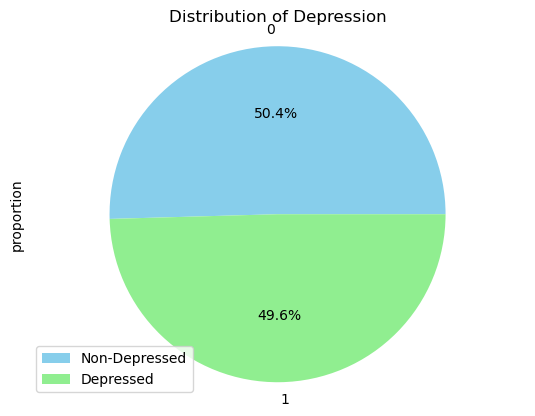

In [6]:
df["is_depression"].value_counts(normalize=True).plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "lightgreen"])
plt.axis('equal')
plt.title('Distribution of Depression')
plt.legend(labels=["Non-Depressed", "Depressed"])
plt.show()

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [9]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [10]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\supul
[nltk_data]    |     kalhara\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\supul
[nltk_data]    |     kalhara\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\supul
[nltk_data]    |     kalhara\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\supul
[nltk_data]    |     kalhara\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to C:\Users

True

In [12]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [13]:
w=WordNetLemmatizer()
for i in range(len(df)):
  review=re.sub('[^a-zA-Z]', ' ', df["clean_text"][i])
  review=review.lower()
  review=review.split()
  review=[w.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
  review=" ".join(review)
  df["clean_text"][i]=review
df.head()

C:\Users\supul kalhara\AppData\Local\Temp\ipykernel_4748\793212518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"][i]=review
C:\Users\supul kalhara\AppData\Local\Temp\ipykernel_4748\793212518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"][i]=review
C:\Users\supul kalhara\AppData\Local\Temp\ipykernel_4748\793212518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"][i]=review
C

,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1


In [14]:
s=set()

for i in range(len(df)):
    k=df["clean_text"][i].split()
    for j in range(len(k)):
        s.add(k[j])
len(s)

18611

In [15]:
voc_size=18611
onehot_repr1=[one_hot(words,voc_size)for words in df["clean_text"]]

In [16]:
max=0
for i in onehot_repr1:
    if len(i)>max:
        max=len(i)
max

1844

In [17]:
sent_length=max
embedded_docs1=pad_sequences(onehot_repr1,padding='pre',maxlen=sent_length)

In [18]:
embedding_vector_features=sent_length*2
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add((LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1844, 3688)        68637368  
                                                                 
 lstm (LSTM)                 (None, 100)               1515600   
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 70,153,069
Trainable params: 70,153,069
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
Y=df["is_depression"]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(embedded_docs1,Y,test_size=0.2,random_state=10,stratify=Y)

In [21]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=2,batch_size=16)

Epoch 1/2
387/387 [==============================] - 5147s 13s/step - loss: 0.1398 - accuracy: 0.9518 - val_loss: 0.0887 - val_accuracy: 0.9677
Epoch 2/2
387/387 [==============================] - 4819s 12s/step - loss: 0.0352 - accuracy: 0.9880 - val_loss: 0.1077 - val_accuracy: 0.9651


In [28]:
import joblib

joblib.dump(model, 'D:\Web_Applications\Depression-Chat-App\depression-checking-node-backend\model_dep.joblib')

INFO:tensorflow:Assets written to: ram://72023d6f-3e69-4d52-a941-536d331513b1/assets


INFO:tensorflow:Assets written to: ram://72023d6f-3e69-4d52-a941-536d331513b1/assets


['D:\\Web_Applications\\Depression-Chat-App\\depression-checking-node-backend\\model_dep.joblib']

In [30]:
import pickle
model_ = joblib.load('D:\Web_Applications\Depression-Chat-App\depression-checking-node-backend\model_dep.joblib')

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://bcf64b60-c49c-4eef-9e34-5787c506cf30/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [33]:
chat_text = "Sorry I feel tired"

In [34]:
w=WordNetLemmatizer()

chat_text=re.sub('[^a-zA-Z]', ' ', chat_text)
chat_text=chat_text.lower()
chat_text=chat_text.split()
chat_text=[w.lemmatize(word) for word in chat_text if not word in set(stopwords.words("english"))]

In [35]:
voc_size=18611
onehot_repr1=[one_hot(words,voc_size)for words in chat_text]

In [36]:
embedded_docs1 = pad_sequences(onehot_repr1,padding='pre',maxlen=1844)

In [37]:
Y_pred = loaded_model.predict(embedded_docs1)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020A69632670>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020A69632670>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020A69632670>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 26s 26s/step


In [32]:
from tensorflow.keras.models import Sequential, model_from_json


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [38]:
Y_pred

array([[0.19269872],
       [0.13538572],
       [0.04113388]], dtype=float32)